## Observations and Insights 

In [43]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, how="inner", on="Mouse ID")

# Display the data table for preview
combined_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
number_of_mice = combined_data["Mouse ID"].count()
number_of_mice


1893

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_data[combined_data.duplicated(["Mouse ID", "Timepoint"])]
duplicate_mice


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_ID = combined_data[combined_data.duplicated(["Mouse ID"])]
duplicate_mouse_ID



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_data.drop_duplicates("Mouse ID")
clean_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [11]:
# Checking the number of mice in the clean DataFrame.
clean_df = clean_df["Mouse ID"].count()
clean_df


249

## Summary Statistics

In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

    # Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
    # mean, median, variance, standard deviation, and SEM of the tumor volume:

mean = combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median = combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance = combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
standard_deviation = combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem = combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
    
# Assemble the resulting series into a single summary dataframe.
summary_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, 
                           "Standard Deviation": standard_deviation, "SEM": sem})




In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [33]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drug_regimen = pd.DataFrame(combined_data.groupby(["Drug Regimen"]).count()).reset_index()
treatment_df = drug_regimen[["Drug Regimen", "Mouse ID"]]
treatment_df = treatment_df.set_index("Drug Regimen")

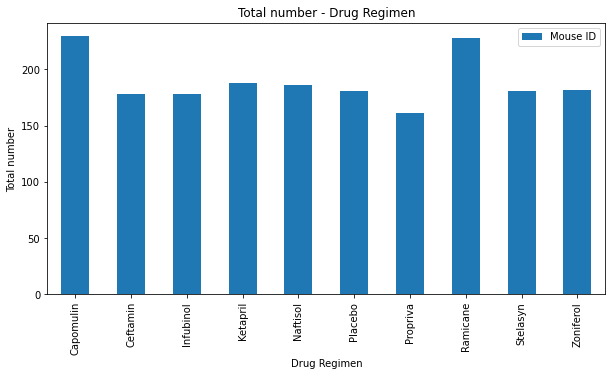

In [46]:
treatment_df.plot(kind="bar", figsize=(10,5))
plt.title("Total number - Drug Regimen")
plt.ylabel("Total number")
plt.show()


In [39]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

    # List of treatment regimen:
treatment_reg = summary_df.index.tolist()
treatment_reg

['Capomulin',
 'Ceftamin',
 'Infubinol',
 'Ketapril',
 'Naftisol',
 'Placebo',
 'Propriva',
 'Ramicane',
 'Stelasyn',
 'Zoniferol']

In [41]:
    # List of drug count:
drug_count_list = (combined_data.groupby(["Drug Regimen"])["Age_months"].count()).tolist()
drug_count_list

[230, 178, 178, 188, 186, 181, 161, 228, 181, 182]

In [44]:
    # Define x axis:
x_axis = np.arange(len(drug_count_list))

In [45]:
    # Assign x axis:
x_axis = treatment_reg

Text(0, 0.5, 'Total number')

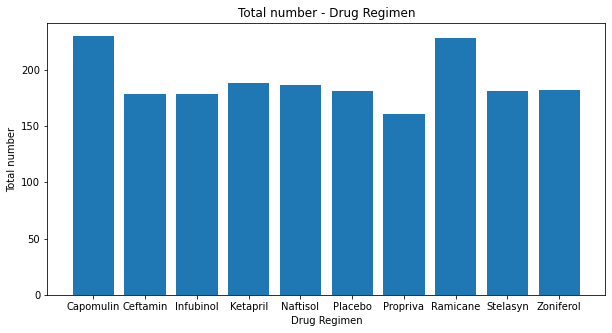

In [51]:
    # Bar plot generation using pyplot:
plt.figure(figsize=(10,5))
plt.bar(x_axis, drug_count_list) 
plt.title("Total number - Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total number")



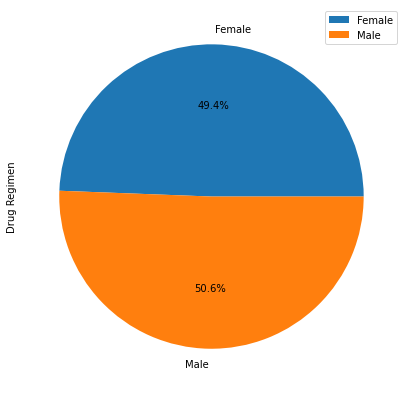

In [116]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
female_vs_male = combined_data.groupby("Sex")
distribution = female_vs_male["Drug Regimen"].count()

pd_plot = distribution.plot.pie(x="Regimen Count Female versus Male", figsize=(7, 7),autopct="%1.1f%%", legend =True)

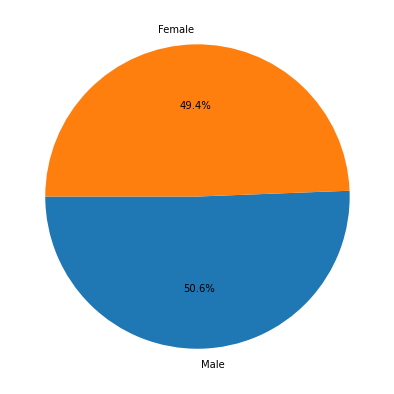

In [294]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sizes = [female_vs_male["Drug Regimen"].count()[1], female_vs_male["Drug Regimen"].count()[0]]
labels = ["Male", "Female"]

py_plot = plt.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=180)

plt.rcParams["figure.figsize"] = [7, 7]


## Quartiles, Outliers and Boxplots

In [164]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
final_tumor_volume = combined_data[combined_data["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]

# Start by getting the last (greatest) timepoint for each mouse
final_tumor_volume = final_tumor_volume.sort_values(["Timepoint"], ascending=True)
final_tumor_volume.head()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
final_tumor_volume_df = final_tumor_volume[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
final_tumor_volume_df

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Ramicane,k403,0,45.000000
1391,Infubinol,q132,0,45.000000
195,Capomulin,i738,0,45.000000
205,Ramicane,a520,0,45.000000
1370,Ceftamin,p438,0,45.000000
...,...,...,...,...
350,Capomulin,v923,45,40.658124
144,Capomulin,m957,45,33.329098
337,Capomulin,j119,45,38.125164
59,Ramicane,s508,45,30.276232


In [202]:
# Put treatments into a list for for loop (and later for plot labels)
tumor_vol_data = treatments_df.reset_index()
tumor_lists = tumor_vol_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].apply(list)
tumor_lists_df = pd.DataFrame(tumor_lists)
tumor_lists_df = tumor_lists_df.reindex(top_four_treatments)
final_volume = [vol for vol in tumor_lists_df["Tumor Volume (mm3)"]]
mice_regimens_sort = final_tumor_volume_df.groupby(["Drug Regimen", "Mouse ID"]).last()["Tumor Volume (mm3)"]
mice_regimens_sort.head()
treatments_df = mice_regimens_sort.to_frame()
treatments_df


# Create empty list to fill with tumor vol data (for plotting)
top_four_treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
main_regimens = combined_data[(combined_data["Drug Regimen"] == "Capomulin") | 
                              (combined_data["Drug Regimen"] == "Ramicane") |
                              (combined_data["Drug Regimen"] == "Infubinol") |
                              (combined_data["Drug Regimen"] == "Ceftamin")]
                                          

quartiles = regimens_plot.quantile([0.25,0.5,0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq

print(f"The lower quartile is: {lowerq}")
print("The upper quartile is: {upperq}")
print(f"The interquartile is: {iqr}")
    # Locate the rows which contain mice on each drug and get the tumor volumes
main_regimens = main_regimens[["Mouse ID", "Drug Regimen", "Tumor Volume (mm3)"]]
main_regimens = main_regimens.groupby(["Mouse ID", "Drug Regimen"])
    
    
    # add subset 
main_regimens_df = main_regimens["Tumor Volume (mm3)"].sum().to_frame()
regimens_plot = main_regimens_df["Tumor Volume (mm3)"]
    
    
    # Determine outliers using upper and lower bounds
upper_bond = upperq - (1.5*iqr)
lower_bound = lowerq - (1.5*iqr)
print("The Values above {upper_bond} could be outliers")
print("The Values below {lower_bond} could be outliers")

The lower quartile is: 340.0010610275
The upper quartile is: {upperq}
The interquartile is: 109.98349862749996
The Values above {upper_bond} could be outliers
The Values below {lower_bond} could be outliers


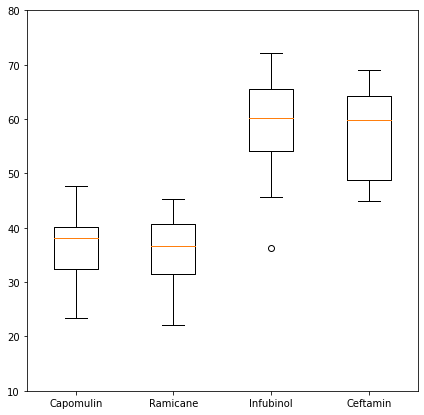

In [175]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(final_volume, labels=top_four_treatments)
plt.ylim(10, 80)
plt.show()

## Line and Scatter Plots

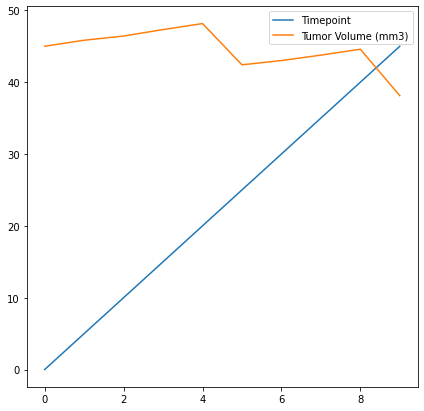

In [173]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
tumor_volume_vs_time_point = combined_data[combined_data["Mouse ID"].isin(["j119"])]
tumor_volume_vs_time_point 

tumor_volume_vs_time_point_info = tumor_volume_vs_time_point[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
tumor_volume_vs_time_point_info

line_plot_df = tumor_volume_vs_time_point_info.reset_index()
line_plot_df

line_plot_def = line_plot_df[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
line_plot_def

line_plot_tumor_vol_vs_time_point = line_plot_def.plot.line()

<Figure size 504x504 with 0 Axes>

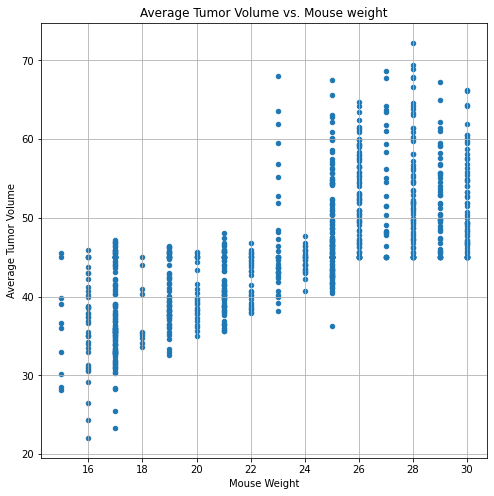

In [291]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_regimen = combined_data[combined_data["Drug Regimen"].isin(["Capomulin"])]
capomulin_regimen_df = final_tumor_volume[["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
capomulin_regimen_df.head()

plt.figure()
capomulin_regimen_df.plot(x="Weight (g)", y="Tumor Volume (mm3)",kind = "scatter", grid = True, figsize=(8,8))
plt.title("Average Tumor Volume vs. Mouse weight")
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume")
plt.show()

## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


In [263]:
correlation_coefficient = st.pearsonr(capomulin_regimen_df["Weight (g)"], capomulin_regimen_df["Tumor Volume (mm3)"])
print(f"The correlation coefficient is {round(correlation[0],2)}")

The correlation coefficient is 0.71


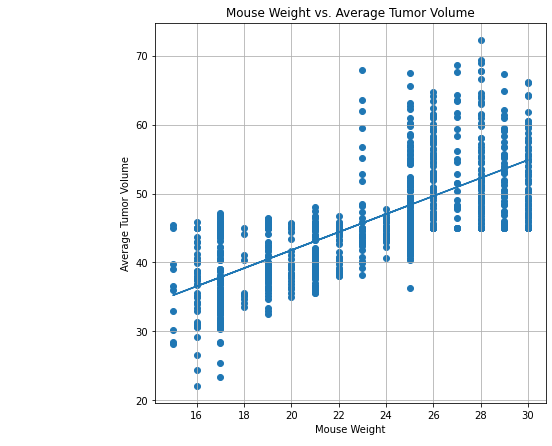

In [289]:
# Linear regression
x_values = capomulin_regimen_df["Weight (g)"]
y_values = capomulin_regimen_df["Tumor Volume (mm3)"]
plt.figure()
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values) 
regression_values = x_values * slope + intercept
linear_equation = "y = "+ str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regression_values)
plt.title("Mouse Weight vs. Average Tumor Volume")
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume")
plt.annotate(linear_equation,(8,15),fontsize=20)
plt.grid(True)
plt.show()